# HW 1
The homework assignments is on calibrating the Inertial sensor in our cell phones via the 6-position method. The first part will be to use recorded data to calibrate the accelerometer, the second part will be to calibrate the gyroscopes and the third part will be to analyze recorded data of "shaking the smartphone". Finally, we will compare different phones with one another and with our expectations from their specifications. 


In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../src')
from ins import Accelerometer
from ins import Gyroscope
sys.path.append('../notebooks')
np.set_printoptions(precision=4, suppress=True)

# Load the data
path_accel_300sec_face_up = os.path.join("..", "data", "Acceleration_300sec_FaceUp")
path_accel_300sec_face_down = os.path.join("..", "data", "Acceleration_300sec_FaceDown")
path_accel_300sec_side_positive = os.path.join("..", "data", "Acceleration_300sec_SidePositive")
path_accel_300sec_side_negative = os.path.join("..", "data", "Acceleration_300sec_SideNegative")
path_accel_300sec_vertical_front = os.path.join("..", "data", "Acceleration_300sec_VerticalFront")
path_accel_300sec_vertical_back = os.path.join("..", "data", "Acceleration_300sec_VerticalBack")

accel_300sec_face_up = pd.read_csv(os.path.join(path_accel_300sec_face_up, "Raw Data.csv")) # This had a delimiter of ","
accel_300sec_face_down = pd.read_csv(os.path.join(path_accel_300sec_face_down, "Raw Data.csv"), sep="\t", engine="python")
accel_300sec_side_positive = pd.read_csv(os.path.join(path_accel_300sec_side_positive, "Raw Data.csv"), sep="\t", engine="python")
accel_300sec_side_negative = pd.read_csv(os.path.join(path_accel_300sec_side_negative, "Raw Data.csv"), sep="\t", engine="python")
accel_300sec_vertical_front = pd.read_csv(os.path.join(path_accel_300sec_vertical_front, "Raw Data.csv"), sep="\t", engine="python")
accel_300sec_vertical_back = pd.read_csv(os.path.join(path_accel_300sec_vertical_back, "Raw Data.csv"), sep="\t", engine="python")

In [2]:
def remove_rows_by_time(df, start_time, end_time):
    return df[(df["Time (s)"] >= start_time) & (df["Time (s)"] <= end_time)]

# Select the first 5 seconds of data
fz_up_5sec = remove_rows_by_time(accel_300sec_face_up, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fz_down_5sec = remove_rows_by_time(accel_300sec_face_down, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_up_5sec = remove_rows_by_time(accel_300sec_side_positive, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_down_5sec = remove_rows_by_time(accel_300sec_side_negative, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_up_5sec = remove_rows_by_time(accel_300sec_vertical_front, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_down_5sec = remove_rows_by_time(accel_300sec_vertical_back, 0, 5)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])

# Select the first 60 seconds of data
fz_up_60sec = remove_rows_by_time(accel_300sec_face_up, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fz_down_60sec = remove_rows_by_time(accel_300sec_face_down, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_up_60sec = remove_rows_by_time(accel_300sec_side_positive, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_down_60sec = remove_rows_by_time(accel_300sec_side_negative, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_up_60sec = remove_rows_by_time(accel_300sec_vertical_front, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_down_60sec = remove_rows_by_time(accel_300sec_vertical_back, 0, 60)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])

# Select the first 300 seconds of data
fz_up_300sec = remove_rows_by_time(accel_300sec_face_up, 20, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fz_down_300sec = remove_rows_by_time(accel_300sec_face_down, 0, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_up_300sec = remove_rows_by_time(accel_300sec_side_positive, 0, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fx_down_300sec = remove_rows_by_time(accel_300sec_side_negative, 0, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_up_300sec = remove_rows_by_time(accel_300sec_vertical_front, 0, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])
fy_down_300sec = remove_rows_by_time(accel_300sec_vertical_back, 0, 300)[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].mean().to_numpy().reshape([3,1])


### Part 1 - Calculate bias and scale factor assuming no misalignment

In [3]:
g_true = 9.81 # m/s^2

# create sensors objects for the accelerometers for the different time periods (5, 60, 300 seconds)
Elad_acc_300 = Accelerometer(name="Elad accelerometer 300 sec")
Elad_acc_300.set_calibration_data(
    fx_up=fx_up_300sec, fx_down=fx_down_300sec, 
    fy_up=fy_up_300sec, fy_down=fy_down_300sec, 
    fz_up=fz_up_300sec, fz_down=fz_down_300sec, 
    g=g_true)

Elad_acc_60 = Accelerometer(name="Elad accelerometer 60 sec")
Elad_acc_60.set_calibration_data(
    fx_up=fx_up_60sec, fx_down=fx_down_60sec, 
    fy_up=fy_up_60sec, fy_down=fy_down_60sec, 
    fz_up=fz_up_60sec, fz_down=fz_down_60sec, 
    g=g_true)

Elad_acc_5 = Accelerometer(name="Elad accelerometer 5 sec")
Elad_acc_5.set_calibration_data(
    fx_up=fx_up_5sec, fx_down=fx_down_5sec, 
    fy_up=fy_up_5sec, fy_down=fy_down_5sec, 
    fz_up=fz_up_5sec, fz_down=fz_down_5sec, 
    g=g_true)



In [4]:
bias = Elad_acc_300.compute_bias()
bias = Elad_acc_60.compute_bias()
bias = Elad_acc_5.compute_bias()
scale_factor = Elad_acc_300.compute_scale_factor()
scale_factor = Elad_acc_60.compute_scale_factor()
scale_factor = Elad_acc_5.compute_scale_factor()

In [5]:
# Compute bias and scale factor for each accelerometer
bias_300 = Elad_acc_300.compute_bias()
scale_factor_300 = Elad_acc_300.compute_scale_factor()

bias_60 = Elad_acc_60.compute_bias()
scale_factor_60 = Elad_acc_60.compute_scale_factor()

bias_5 = Elad_acc_5.compute_bias()
scale_factor_5 = Elad_acc_5.compute_scale_factor()

# Print stats for each accelerometer
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"bias x: {bias_300[0][0]}\nbias y: {bias_300[1][0]}\nbias z: {bias_300[2][0]}")
print(f"scale factor x: {scale_factor_300[0,0]}\nscale factor y: {scale_factor_300[1,1]}\nscale factor z: {scale_factor_300[2,2]}")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"bias x: {bias_60[0][0]}\nbias y: {bias_60[1][0]}\nbias z: {bias_60[2][0]}")
print(f"scale factor x: {scale_factor_60[0,0]}\nscale factor y: {scale_factor_60[1,1]}\nscale factor z: {scale_factor_60[2,2]}")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"bias x: {bias_5[0][0]}\nbias y: {bias_5[1][0]}\nbias z: {bias_5[2][0]}")
print(f"scale factor x: {scale_factor_5[0,0]}\nscale factor y: {scale_factor_5[1,1]}\nscale factor z: {scale_factor_5[2,2]}")


Stats for Elad accelerometer 300 sec sensors:
bias x: -0.1158063922523711
bias y: -0.10503980806126378
bias z: -0.05691902900106349
scale factor x: -0.0023219266758937704
scale factor y: -0.0005673196024088695
scale factor z: 0.009421093341819006
Stats for Elad accelerometer 60 sec sensors:
bias x: -0.11745049793456364
bias y: -0.10477003008148067
bias z: -0.053748730834468184
scale factor x: -0.0023302435136073386
scale factor y: -0.0005620297959341294
scale factor z: 0.008852610711612611
Stats for Elad accelerometer 5 sec sensors:
bias x: -0.1185162901071326
bias y: -0.10473420297231861
bias z: -0.0455009626335281
scale factor x: -0.002393985581747024
scale factor y: -0.0006820678524618954
scale factor z: 0.007858681241641942


### Part 2 - Calculate Scale Factor, Bias and Misalignment using LSM

In [6]:
# Calculate the errors matrix M = [SF + M | b]
M300 = Elad_acc_300.compute_M_errors_matrix()
M60 = Elad_acc_60.compute_M_errors_matrix()
M10 = Elad_acc_5.compute_M_errors_matrix()

In [7]:
print(f"Stats for {Elad_acc_300.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M300}")

print(f"Stats for {Elad_acc_60.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M60}")

print(f"Stats for {Elad_acc_5.get_sensor_name()} sensors:")
print(f"M Matrix:\n{M10}")

Stats for Elad accelerometer 300 sec sensors:
M Matrix:
[[-0.0023 -0.0069 -0.0047 -0.1133]
 [ 0.0028 -0.0006  0.0055 -0.0857]
 [ 0.0139  0.0002  0.0094 -0.0909]]
Stats for Elad accelerometer 60 sec sensors:
M Matrix:
[[-0.0023 -0.0069 -0.0047 -0.1137]
 [ 0.0028 -0.0006  0.0055 -0.0859]
 [ 0.0135  0.0004  0.0089 -0.0897]]
Stats for Elad accelerometer 5 sec sensors:
M Matrix:
[[-0.0024 -0.0071 -0.0045 -0.1145]
 [ 0.0029 -0.0007  0.0058 -0.0862]
 [ 0.0134  0.0017  0.0079 -0.0763]]


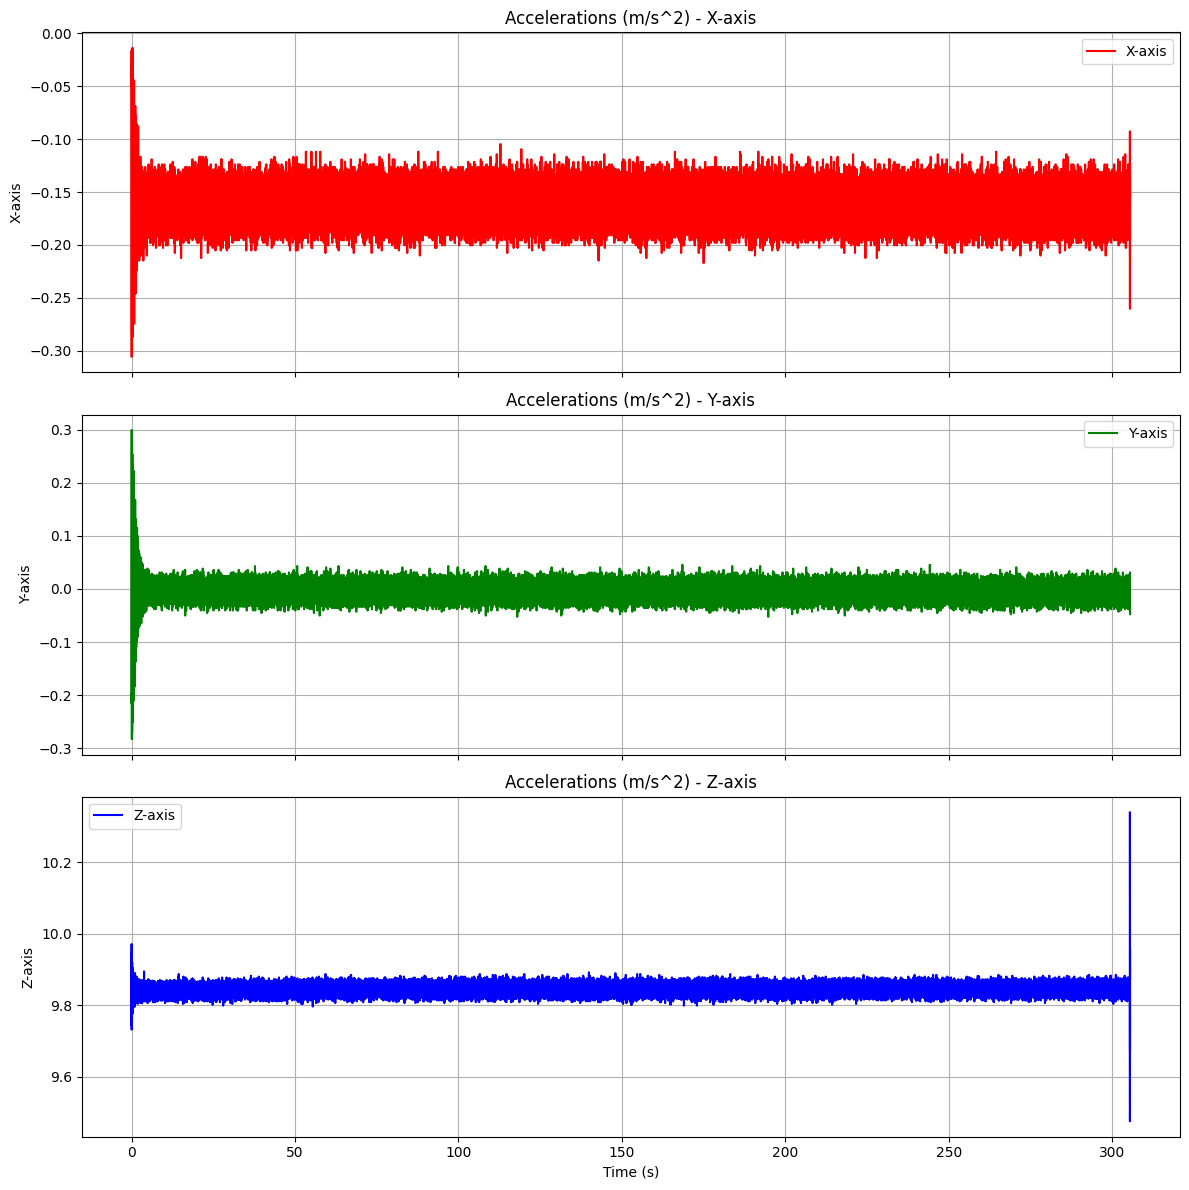

In [10]:
xdata = accel_300sec_face_up["Time (s)"].to_numpy()
ydata = accel_300sec_face_up[["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"]].to_numpy()
Elad_acc_300.plot_time_series(xdata, ydata, "Accelerations (m/s^2)", "Time (s)")


In [9]:
accel_300sec_face_up.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.022898,-0.049651,-0.196211,9.852148,9.854227
1,0.025323,-0.016152,-0.215354,9.873684,9.876045
2,0.027749,-0.064008,-0.133998,9.945468,9.946577
3,0.030174,-0.121436,-0.122034,9.962218,9.963706
4,0.032599,-0.133400,-0.086142,9.971789,9.973054
